In [1]:
import pandas as pd
import numpy as np
data= pd.read_csv('/Users/mikid/Downloads/mushrooms.csv')

In [2]:
data = data[['class', 'cap-color', 'bruises', 'odor', 'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','spore-print-color']]


In [3]:
data.head()

,class,cap-color,bruises,odor,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color
0,p,n,t,p,e,s,s,k
1,e,y,t,a,c,s,s,n
2,e,w,t,l,c,s,s,n
3,p,w,t,p,e,s,s,k
4,e,g,f,n,e,s,s,n


In [4]:
data["class"].replace(["e", "p"], [0, 1], inplace= True)

In [5]:
# Use One Hot Encoding to change X-train categorical data to 0 and 1's
data = pd.concat([pd.get_dummies(data[col], drop_first = True) for col in data], axis=1, keys=data.columns)
data.head()

class cap-color                          ... stalk-surface-below-ring     \
      1         c  e  g  n  p  r  u  w  y  ...                        s  y   
0     1         0  0  0  1  0  0  0  0  0  ...                        1  0   
1     0         0  0  0  0  0  0  0  0  1  ...                        1  0   
2     0         0  0  0  0  0  0  0  1  0  ...                        1  0   
3     1         0  0  0  0  0  0  0  1  0  ...                        1  0   
4     0         0  0  1  0  0  0  0  0  0  ...                        1  0   

  spore-print-color                       
                  h  k  n  o  r  u  w  y  
0                 0  1  0  0  0  0  0  0  
1                 0  0  1  0  0  0  0  0  
2                 0  0  1  0  0  0  0  0  
3                 0  1  0  0  0  0  0  0  
4                 0  0  1  0  0  0  0  0  

[5 rows x 37 columns]

In [6]:
X = data.drop(columns = 'class', axis = 1)
y = data['class']
y=y.squeeze()
print(y.shape)


(8124,)


In [7]:
np.sum(y)

3916

In [8]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from matplotlib import pyplot

In [9]:
# split trainig and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Modelling

In [10]:
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)

# Model: Logistic Regression

Feature: 0, Score: -0.33076
Feature: 1, Score: 0.14777
Feature: 2, Score: -0.31004
Feature: 3, Score: -0.46919
Feature: 4, Score: -0.18323
Feature: 5, Score: -0.04208
Feature: 6, Score: -0.04208
Feature: 7, Score: 0.67156
Feature: 8, Score: 0.94161
Feature: 9, Score: 0.38404
Feature: 10, Score: 2.21868
Feature: 11, Score: 3.57684
Feature: 12, Score: -0.61134
Feature: 13, Score: 0.06210
Feature: 14, Score: -2.29697
Feature: 15, Score: 2.35777
Feature: 16, Score: 2.24106
Feature: 17, Score: 2.24106
Feature: 18, Score: 1.64168
Feature: 19, Score: 0.64506
Feature: 20, Score: 1.16259
Feature: 21, Score: -1.28462
Feature: 22, Score: 0.28289
Feature: 23, Score: 0.15639
Feature: 24, Score: -0.43328
Feature: 25, Score: -0.05702
Feature: 26, Score: -0.05848
Feature: 27, Score: 1.83816
Feature: 28, Score: 1.13775
Feature: 29, Score: -1.80871
Feature: 30, Score: -1.92012
Feature: 31, Score: -0.00339
Feature: 32, Score: 1.30350
Feature: 33, Score: -0.50541
Feature: 34, Score: 2.29509
Feature: 35, S

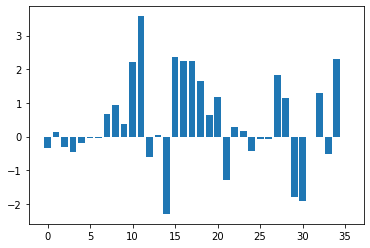

[[1636   42]
 [  22 1550]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1678
           1       0.97      0.99      0.98      1572

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250



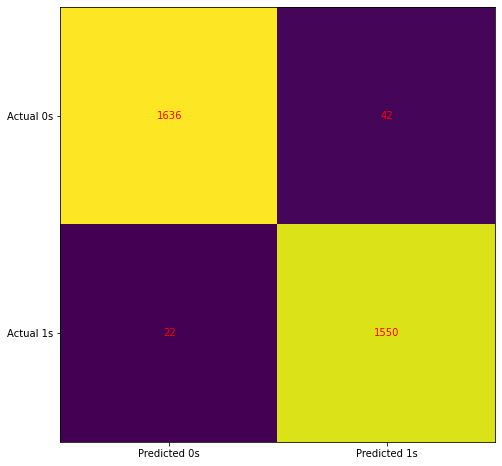

In [11]:


# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test,predictions)

fig, ax = pyplot.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
pyplot.show()

# Evaluation: Logistic Regression model using k-fold cross-validation

In [17]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import (KFold, RepeatedKFold)
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.999 (0.001)


# Model: KneighborsClassifier()

Feature: 0, Score: 0.00281
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00709
Feature: 5, Score: 0.00111
Feature: 6, Score: 0.00113
Feature: 7, Score: 0.00194
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00209
Feature: 10, Score: 0.03323
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00044
Feature: 13, Score: 0.00379
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04220
Feature: 16, Score: 0.00357
Feature: 17, Score: 0.00335
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01164
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00335
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00694
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00290
Feature: 32, Score: 0.01036
Feature: 33, Score: 0.00266
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00266


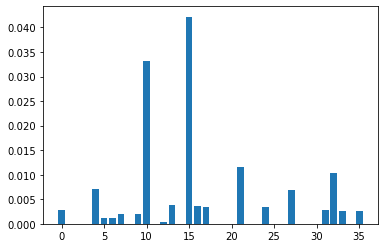

[[1365    0]
 [  47 1269]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1365
           1       1.00      0.96      0.98      1316

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



In [29]:

# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))

# Evaluation:  KNeighbors model using k-fold cross-validation

In [30]:
# evaluate a KNeighbors model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import (KFold, RepeatedKFold)
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# create model
model = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


# Model: Decision Tree 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00042
Feature: 8, Score: 0.00507
Feature: 9, Score: 0.00817
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01161
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.61710
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00659
Feature: 19, Score: 0.17729
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.08573
Feature: 22, Score: 0.01658
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01377
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00107
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.03381
Feature: 33, Score: 0.02278
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000


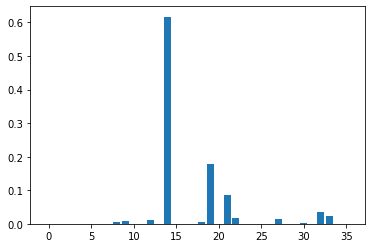

[[1636   42]
 [  22 1550]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1678
           1       0.97      0.99      0.98      1572

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250



In [20]:

# decision tree for feature importance on a classification problem
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))

# Evaluation: Decision Tree model using k-fold cross-validation

In [21]:
# evaluate a decision tree model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# create model
model = model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


# Model: Random Forest

Feature: 0, Score: 0.00047
Feature: 1, Score: 0.00827
Feature: 2, Score: 0.00873
Feature: 3, Score: 0.00754
Feature: 4, Score: 0.00508
Feature: 5, Score: 0.00020
Feature: 6, Score: 0.00017
Feature: 7, Score: 0.01529
Feature: 8, Score: 0.01336
Feature: 9, Score: 0.06424
Feature: 10, Score: 0.02079
Feature: 11, Score: 0.10794
Feature: 12, Score: 0.01408
Feature: 13, Score: 0.00053
Feature: 14, Score: 0.25902
Feature: 15, Score: 0.03808
Feature: 16, Score: 0.02166
Feature: 17, Score: 0.02107
Feature: 18, Score: 0.01495
Feature: 19, Score: 0.02769
Feature: 20, Score: 0.02959
Feature: 21, Score: 0.00666
Feature: 22, Score: 0.06899
Feature: 23, Score: 0.02778
Feature: 24, Score: 0.00076
Feature: 25, Score: 0.05308
Feature: 26, Score: 0.01388
Feature: 27, Score: 0.01086
Feature: 28, Score: 0.03637
Feature: 29, Score: 0.01695
Feature: 30, Score: 0.02147
Feature: 31, Score: 0.00024
Feature: 32, Score: 0.02138
Feature: 33, Score: 0.00251
Feature: 34, Score: 0.04011
Feature: 35, Score: 0.00023


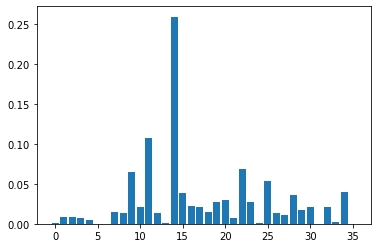

[[1365    0]
 [   0 1316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1365
           1       1.00      1.00      1.00      1316

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



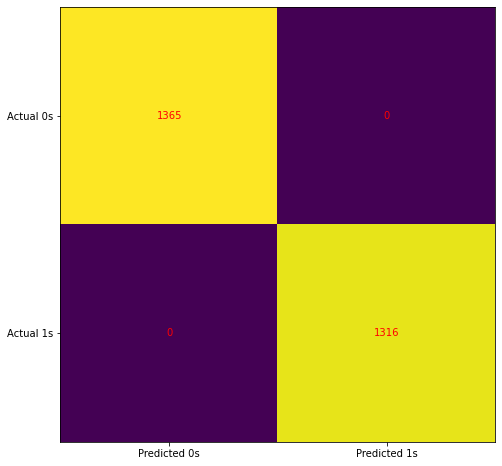

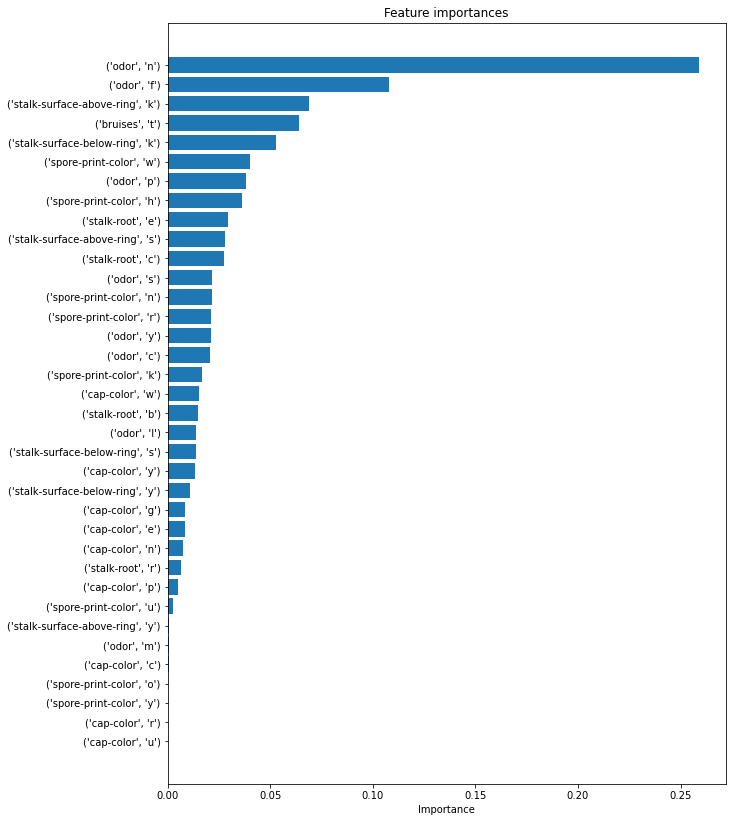

In [44]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset

# define the model
model = RandomForestClassifier(n_estimators = 3000)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))
cm = confusion_matrix(y_test,predictions)

fig, ax = pyplot.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
pyplot.show()
features_list = X.columns.values
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

pyplot.figure(figsize=(10,14))
pyplot.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
pyplot.yticks(range(len(sorted_idx)), features_list[sorted_idx])
pyplot.xlabel('Importance')
pyplot.title('Feature importances')
pyplot.draw()
pyplot.show()

# Evaluation: Random Tree model using k-fold cross-validation

In [23]:
# evaluate a Random Forest model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# create model
model = RandomForestClassifier(n_estimators = 3000)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))


Accuracy: 1.00 (0.00)


# Model: XGboost

[21:42:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00010
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00090
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01559
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.02639
Feature: 12, Score: 0.03934
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.14432
Feature: 15, Score: 0.01769
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00209
Feature: 19, Score: 0.32944
Feature: 20, Score: 0.00015
Feature: 21, Score: 0.31794
Feature: 22, Score: 0.00080
Feature: 23, Score: 0.00015
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00191
Feature: 26, Score: 0.00023
Feature: 27, Score: 0.00961
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00016
Feature: 30, Score: 0.00052
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.02896
Feature: 33, Score: 0.06300
Feature: 34, Score: 0.00070
Feature: 35, Score: 0.00000


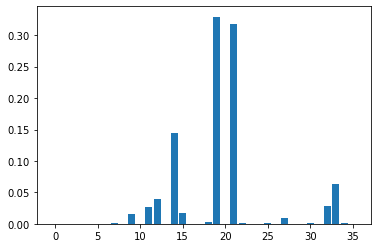

[[1678    0]
 [ 159 1413]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1678
           1       1.00      0.90      0.95      1572

    accuracy                           0.95      3250
   macro avg       0.96      0.95      0.95      3250
weighted avg       0.96      0.95      0.95      3250



/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [24]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset

# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))

# Evaluation: XGboost model using k-fold cross-validation

In [25]:
# evaluate a Xgboost model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import (KFold, RepeatedKFold)
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# create model
model = XGBClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))

Accuracy: 1.00 (0.00)


In [26]:
# Feature Selection by sklearn SelectFromModel

In [42]:

# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=3000), max_features=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data_
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train.values)

# evaluate the model
predictions = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))

Accuracy: 98.25
Recall: 96.43
[[1365    0]
 [  47 1269]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1365
           1       1.00      0.96      0.98      1316

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



# Model: Random Forest, Examing the top 10 features

Accuracy: 98.25
Recall: 96.43
[[1365    0]
 [  47 1269]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1365
           1       1.00      0.96      0.98      1316

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



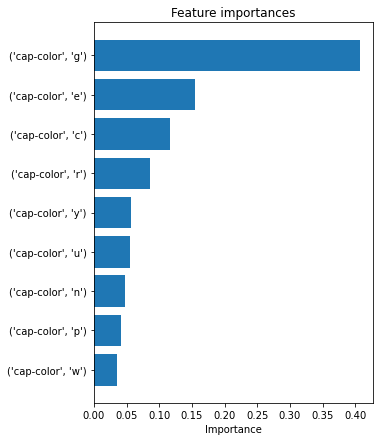

In [39]:
#### # random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
# define dataset

# define the model
model = RandomForestClassifier(n_estimators=3000)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = RandomForestClassifier(n_estimators=3000)
model.fit(X_train_fs, y_train.values)

# evaluate the model
predictions = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))

